In [1]:
import pandas as pd

In [2]:
import os

In [3]:
import numpy as np

In [4]:
os.chdir('../')

In [5]:
path = 'artifacts/data_transform/train.csv'

In [6]:
data = pd.read_csv(path)

In [7]:
data.head()

,budget,genres,production_countries,runtime,spoken_languages,crew,release_month,hero,heroine,footfall
0,110000000,"['Action', 'Comedy', 'Drama', 'Thriller']",US,120.0,en,Doug Liman,Jun,Angelina Jolie,Brad Pitt,74603357.0
1,18000000,"['Romance', 'Music', 'Family']",US,94.0,en,Bille Woodruff,Nov,Jessica Alba,Mekhi Phifer,10389181.0
2,32500000,"['Comedy', 'Romance']",US,125.0,en,Paul Feig,Apr,Kristen Wiig,Rose Byrne,36366144.0
3,11000000,"['Drama', 'History']",US,124.0,en,Martin Ritt,Jan,Sean Connery,Samantha Eggar,1419354.0
4,72000000,"['Drama', 'Romance']",US,152.0,en,Frank Darabont,Dec,Jim Carrey,Martin Landau,6593208.0


In [8]:
x = data['genres']

In [9]:
data.isnull().sum()

budget                  0
genres                  0
production_countries    0
runtime                 0
spoken_languages        0
crew                    0
release_month           0
hero                    0
heroine                 0
footfall                0
dtype: int64

In [10]:
target = data['footfall']

In [11]:
import matplotlib.pyplot as plt

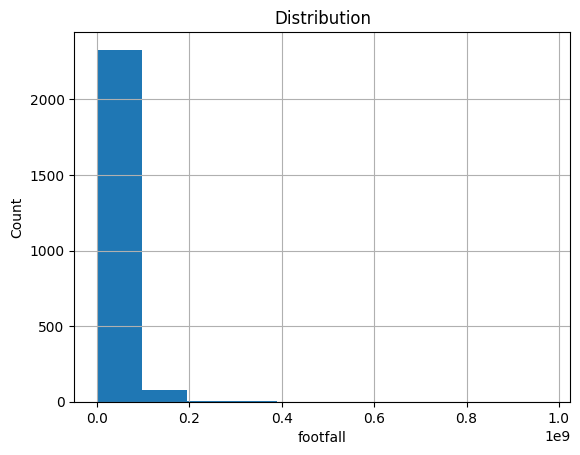

In [12]:
target.hist(bins=10)
plt.xlabel('footfall')
plt.ylabel("Count")
plt.title('Distribution')
plt.show()

In [13]:
(data==0).sum()

budget                  0
genres                  0
production_countries    0
runtime                 0
spoken_languages        0
crew                    0
release_month           0
hero                    0
heroine                 0
footfall                1
dtype: int64

In [14]:
target = np.log(target)

/Volumes/T7/Box_office_prediction_project/boxoffice/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
organized_data = pd.read_csv('artifacts/data_transform/organized_cinema.csv')

In [16]:
zero_features = [feature for feature in organized_data if (organized_data[feature]==0).sum()>1]

In [17]:
print(zero_features)

['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']


In [18]:
cond = (organized_data[zero_features]==0).any(axis=1)

In [19]:
organized_data = organized_data[~cond]

In [20]:
(organized_data==0).sum()

budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
vote_average            0
vote_count              0
crew                    0
release_month           0
avg_ticket_price        0
hero                    0
heroine                 0
dtype: int64